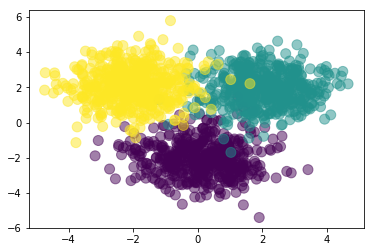

In [24]:
import numpy as np
import matplotlib.pyplot as plt

N = 500
D = 2 #n of dimensions
M = 3 #hidden layer size (number of neurons)
K = 3 #n of classes

#creating 3 gaussian clouds
X1 = np.random.randn(N, 2) + np.array([0, -2])
X2 = np.random.randn(N, 2) + np.array([2, 2])
X3 = np.random.randn(N, 2) + np.array([-2, 2])
X = np.vstack([X1, X2, X3])

Y = np.array([0]*N + [1]*N + [2]*N)
N = len(Y)

T = np.zeros((N, K))
for i in range(N):
    T[i, Y[i]] = 1

plt.scatter(X[:,0], X[:,1], c=Y, s=100, alpha=0.5)
plt.show()

In [25]:
def softmax(a):
    expA = np.exp(a)
    return expA / expA.sum(axis=1, keepdims=True)

def forward(X, W1, b1, W2, b2):
    Z = 1 / (1 + np.exp(-X.dot(W1) - b1)) #sigmoid
    A = Z.dot(W2) + b2
    expA = np.exp(A)
    Y = expA / expA.sum(axis=1, keepdims=True)
    return Y, Z

def classification_rate(Y, P):
    return np.mean(Y == P)

In [26]:
#random initializing weights
W1 = np.random.randn(D, M)
b1 = np.zeros(M)
W2 = np.random.randn(M, K)
b2 = np.zeros(K)

In [27]:
def derivative_w2(Z, T, Y):
    N, K = T.shape
    M = Z.shape[1]
    
#     #slow way
#     ret1 = np.zeros((M, K))
#     for n in range(N):
#         for m in range(M):
#             for k in range(K):
#                 ret1[m,k] += (T[n,k] - Y[n,k])*Z[n,m]

#     ret2 = np.zeros((M, K))
#     for n in range(N):
#         for k in range(K):
#             ret2[:,k] += (T[n,k] - Y[n,k])*Z[n,:]
        
#     ret3 = np.zeros((M, K))
#     for n in range(N):
#         ret3 += np.outer(Z[n], T[n] - Y[n])
        
    #best
    ret4 = Z.T.dot(T - Y)
    return ret4

def derivative_b2(T, Y):
    return (T - Y).sum(axis=0)

def derivative_w1(X, Z, T, Y, W2):
#     N, D = X.shape
#     M, K = W2.shape
    
#     #slow
#     ret1 = np.zeros((D, M))
#     for n in range(N):
#         for k in range(K):
#             for m in range(M):
#                 for d in range(D):
#                     ret1[d,m] += (T[n,k] - Y[n,k]) * W2[m,k]*Z[n,m]*(1 - Z[n,m])*X[n,d]

    dZ = (T - Y).dot(W2.T) * Z * (1 - Z)
    return X.T.dot(dZ)

def derivative_b1(T, Y, W2, Z):
    return ((T - Y).dot(W2.T) * Z * (1-Z)).sum(axis=0)

def cost(T, Y):
    tot = T * np.log(Y)
    return tot.sum()

In [28]:
learning_rate = 10e-7
costs = []
for epoch in range(100000):
    output, hidden = forward(X, W1, b1, W2, b2)
    if epoch % 1000 == 0:
        c = cost(T, output)
        P = np.argmax(output, axis=1)
        r = classification_rate(Y, P)
        print("Cost:", c, "Classification rate:", r)
        costs.append(c)
        
    W2 += learning_rate * derivative_w2(hidden, T, output)
    b2 += learning_rate * derivative_b2(T, output)
    W1 += learning_rate * derivative_w1(X, hidden, T, output, W2)
    b1 += learning_rate * derivative_b1(T, output, W2, hidden)

Cost: -1219.1640158 Classification rate: 0.600666666667
Cost: -995.226024919 Classification rate: 0.915333333333
Cost: -869.635522153 Classification rate: 0.951333333333
Cost: -777.133479789 Classification rate: 0.959333333333
Cost: -703.254515479 Classification rate: 0.96
Cost: -642.568383368 Classification rate: 0.96
Cost: -591.953673319 Classification rate: 0.961333333333
Cost: -549.252495935 Classification rate: 0.962
Cost: -512.870794672 Classification rate: 0.964
Cost: -481.59745869 Classification rate: 0.964
Cost: -454.49725462 Classification rate: 0.964
Cost: -430.839167431 Classification rate: 0.964666666667
Cost: -410.045798162 Classification rate: 0.965333333333
Cost: -391.656664766 Classification rate: 0.966
Cost: -375.301160843 Classification rate: 0.965333333333
Cost: -360.678406353 Classification rate: 0.965333333333
Cost: -347.542094824 Classification rate: 0.966
Cost: -335.689001307 Classification rate: 0.966
Cost: -324.950194771 Classification rate: 0.966
Cost: -315.1